# Libraries & Environment

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split

tf.keras.backend.clear_session()

# Data import & preparation

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print("train labels:")
train_df = pd.DataFrame({"count" : list(y_train)})["count"].value_counts().reset_index().sort_values(by = "index")
train_df["proportion"] = train_df["count"]/len(x_train)
print(train_df)
print("\n")

print("val labels:")
val_df = pd.DataFrame({"count" : list(y_val)})["count"].value_counts().reset_index().sort_values(by = "index")
val_df["proportion"] = val_df["count"]/len(x_val)
print(val_df)
print("\n")

print("test labels:")
test_df = pd.DataFrame({"count" : list(y_test)})["count"].value_counts().reset_index().sort_values(by = "index")
test_df["proportion"] = test_df["count"]/len(x_test)
print(test_df)
print("\n")

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x train:", x_train.shape)
print("y train:", y_train.shape)
print("x val:", x_val.shape)
print("y val:", y_val.shape)
print("x test:", x_test.shape)
print("y test:", y_test.shape)

train labels:
   index  count  proportion
5      0   4748    0.098917
0      1   5420    0.112917
3      2   4784    0.099667
2      3   4912    0.102333
8      4   4666    0.097208
9      5   4317    0.089938
6      6   4741    0.098771
1      7   4966    0.103458
7      8   4691    0.097729
4      9   4755    0.099062


val labels:
   index  count  proportion
6      0   1175    0.097917
0      1   1322    0.110167
7      2   1174    0.097833
2      3   1219    0.101583
5      4   1176    0.098000
9      5   1104    0.092000
4      6   1177    0.098083
1      7   1299    0.108250
8      8   1160    0.096667
3      9   1194    0.099500


test labels:
   index  count  proportion
6      0    980      0.0980
0      1   1135      0.1135
1      2   1032      0.1032
3      3   1010      0.1010
5      4    982      0.0982
9      5    892      0.0892
8      6    958      0.0958
2      7   1028      0.1028
7      8    974      0.0974
4      9   1009      0.1009


x train: (48000, 28, 28, 1)
y t

# Data Visualisation:

TRAIN DATA:


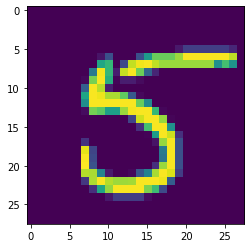

Image label: 5
--------------------------


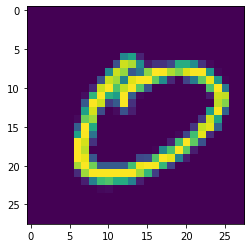

Image label: 0
--------------------------


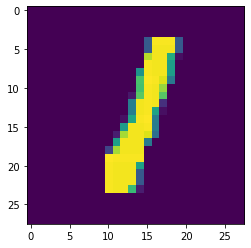

Image label: 1
--------------------------


VALIDATION DATA:


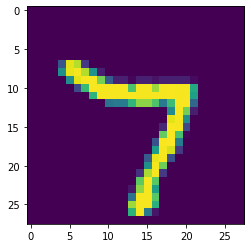

Image label: 7
--------------------------


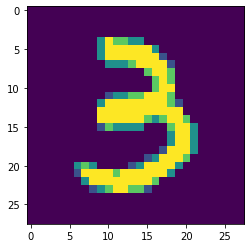

Image label: 3
--------------------------


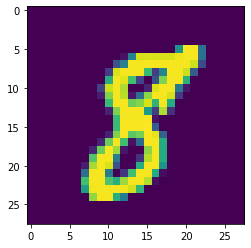

Image label: 8
--------------------------


TEST DATA:


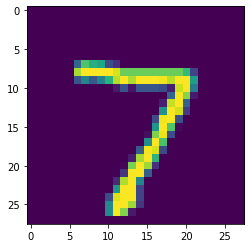

Image label: 7
--------------------------


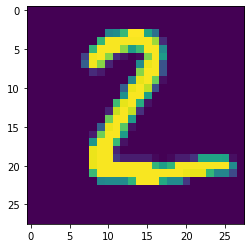

Image label: 2
--------------------------


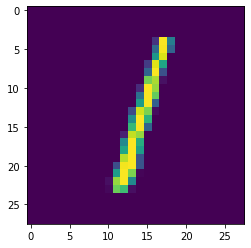

Image label: 1
--------------------------


In [3]:
print("TRAIN DATA:")
for i in np.arange(3):
    plt.imshow(x_train[i])
    plt.show()
    print("Image label:", np.argmax(y_train[i]))
    print("--------------------------")
    
print("\n")
print("VALIDATION DATA:")
for i in np.arange(3):
    plt.imshow(x_val[i])
    plt.show()
    print("Image label:", np.argmax(y_val[i]))
    print("--------------------------")
    
print("\n")
print("TEST DATA:")
for i in np.arange(3):
    plt.imshow(x_test[i])
    plt.show()
    print("Image label:", np.argmax(y_test[i]))
    print("--------------------------")

# Models:

In [4]:
def build_model_1(image_size, channels, start_neurons, dense_neurons, model_name = "model_1"):

    tf.keras.backend.clear_session()
    
    input_tensor = tf.keras.layers.Input(shape = [image_size, image_size, channels])

    conv_1 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(input_tensor)
    conv_2 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(conv_1)
    pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                       strides = (2, 2))(conv_2)

    flatten = tf.keras.layers.Flatten()(pool_1)
    dense = tf.keras.layers.Dense(units = dense_neurons, activation = tf.keras.activations.relu)(flatten)
    output_tensor = tf.keras.layers.Dense(units = 10, activation = tf.keras.activations.softmax)(dense)

    model = tf.keras.models.Model(inputs = input_tensor, 
                                  outputs = output_tensor, 
                                  name = model_name)
    return model

In [5]:
def build_model_2(image_size, channels, start_neurons, dense_neurons, model_name = "model_2"):

    tf.keras.backend.clear_session()
    
    input_tensor = tf.keras.layers.Input(shape = [image_size, image_size, channels])

    conv_1 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(input_tensor)
    bn_1 = tf.keras.layers.BatchNormalization()(conv_1)
    dropout_1 = tf.keras.layers.Dropout(rate = 0.5)(bn_1)
    conv_2 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(dropout_1)
    bn_2 = tf.keras.layers.BatchNormalization()(conv_2)
    dropout_2 = tf.keras.layers.Dropout(rate = 0.5)(bn_2)
    pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                       strides = (2, 2))(dropout_2)

    flatten = tf.keras.layers.Flatten()(pool_1)
    dense = tf.keras.layers.Dense(units = dense_neurons, activation = tf.keras.activations.relu)(flatten)
    bn = tf.keras.layers.BatchNormalization()(dense)
    dropout = tf.keras.layers.Dropout(rate = 0.5)(bn)
    output_tensor = tf.keras.layers.Dense(units = 10, activation = tf.keras.activations.softmax)(dropout)

    model = tf.keras.models.Model(inputs = input_tensor, 
                                  outputs = output_tensor, 
                                  name = model_name)
    return model

In [6]:
def build_model_3(image_size, channels, start_neurons, dense_neurons, model_name = "model_3"):

    tf.keras.backend.clear_session()
    
    input_tensor = tf.keras.layers.Input(shape = [image_size, image_size, channels])

    conv_1 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(input_tensor)
    bn_1 = tf.keras.layers.BatchNormalization()(conv_1)
    dropout_1 = tf.keras.layers.Dropout(rate = 0.5)(bn_1)
    conv_2 = tf.keras.layers.Conv2D(filters = start_neurons * 1, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(dropout_1)
    bn_2 = tf.keras.layers.BatchNormalization()(conv_2)
    dropout_2 = tf.keras.layers.Dropout(rate = 0.5)(bn_2)
    pool_1 = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                       strides = (2, 2))(dropout_2)

    conv_3 = tf.keras.layers.Conv2D(filters = start_neurons * 2, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(pool_1)
    bn_3 = tf.keras.layers.BatchNormalization()(conv_3)
    dropout_3 = tf.keras.layers.Dropout(rate = 0.5)(bn_3)
    conv_4 = tf.keras.layers.Conv2D(filters = start_neurons * 2, 
                                    kernel_size = (3, 3),
                                    strides = (1, 1), 
                                    activation = tf.keras.activations.relu,
                                    padding = "same")(dropout_3)
    bn_4 = tf.keras.layers.BatchNormalization()(conv_4)
    dropout_4 = tf.keras.layers.Dropout(rate = 0.5)(bn_4)
    pool_2 = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
                                       strides = (2, 2))(dropout_4)
    
    flatten = tf.keras.layers.Flatten()(pool_2)
    dense = tf.keras.layers.Dense(units = dense_neurons, activation = tf.keras.activations.relu)(flatten)
    bn = tf.keras.layers.BatchNormalization()(dense)
    dropout = tf.keras.layers.Dropout(rate = 0.5)(bn)
    output_tensor = tf.keras.layers.Dense(units = 10, activation = tf.keras.activations.softmax)(dropout)

    model = tf.keras.models.Model(inputs = input_tensor, 
                                  outputs = output_tensor, 
                                  name = model_name)
    return model

In [7]:
model_1 = build_model_1(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); model_1.summary(); print("\n")
model_2 = build_model_2(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); model_2.summary(); print("\n")
model_3 = build_model_3(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); model_3.summary(); print("\n")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

# Kernels:

--------------------------
Ellipse kernels:


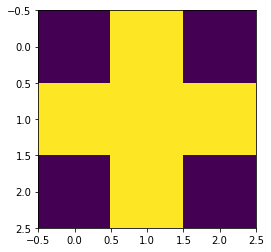

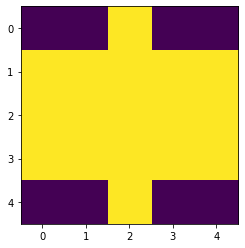

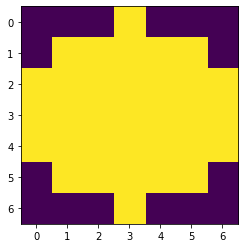

--------------------------
Rect kernels:


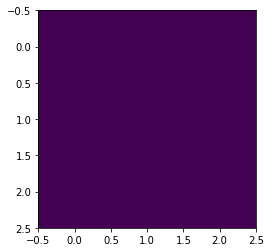

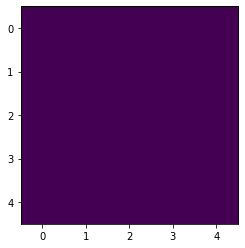

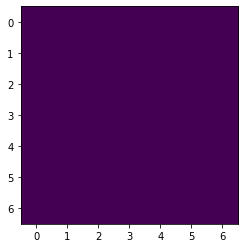

--------------------------
Diamond kernels:


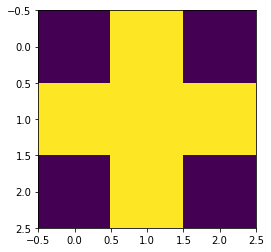

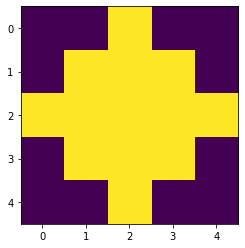

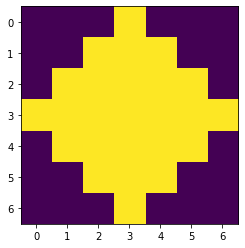

In [8]:
kernel_ellipse_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)).astype("uint8")
kernel_ellipse_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)).astype("uint8")
kernel_ellipse_7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)).astype("uint8")
kernel_ellipse = [kernel_ellipse_3, kernel_ellipse_5, kernel_ellipse_7]

kernel_rect_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)).astype("uint8")
kernel_rect_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)).astype("uint8")
kernel_rect_7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7)).astype("uint8")
kernel_rect = [kernel_rect_3, kernel_rect_5, kernel_rect_7]

kernel_diamond_3 = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]]).astype("uint8")
kernel_diamond_5 = np.array([[0, 0, 1, 0, 0],
                          [0, 1, 1, 1, 0],
                          [1, 1, 1, 1, 1],
                          [0, 1, 1, 1, 0],
                          [0, 0, 1, 0, 0]]).astype("uint8")
kernel_diamond_7 = np.array([[0, 0, 0, 1, 0, 0, 0],
                          [0, 0, 1, 1, 1, 0, 0],
                          [0, 1, 1, 1, 1, 1, 0],
                          [1, 1, 1, 1, 1, 1, 1],
                          [0, 1, 1, 1, 1, 1, 0],
                          [0, 0, 1, 1, 1, 0, 0],
                          [0, 0, 0, 1, 0, 0, 0]]).astype("uint8")
kernel_diamond = [kernel_diamond_3, kernel_diamond_5, kernel_diamond_7]

print("--------------------------")
print("Ellipse kernels:")
for i in np.arange(len(kernel_ellipse)):
    plt.imshow(kernel_ellipse[i])
    plt.show()

print("--------------------------")
print("Rect kernels:")
for i in np.arange(len(kernel_rect)):
    plt.imshow(kernel_rect[i])
    plt.show()
    
print("--------------------------")
print("Diamond kernels:")
for i in np.arange(len(kernel_diamond)):
    plt.imshow(kernel_diamond[i])
    plt.show()

# Opening function

In [9]:
def morphological_transformation_opening(data, kernel):
    result_list = []
    for i in np.arange(data.shape[0]):
        image = data[i,:,:,:]
        image = image.reshape(28, 28)
        image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations = 1)
        result_list.append(image)
    result_list = np.array(result_list)
    result_list = np.expand_dims(result_list, -1)
    
    return result_list
    
print("Train ellipse kernels:")
train_opening_kernel_ellipse_3 = morphological_transformation_opening(data = x_train, kernel = kernel_ellipse_3)
train_opening_kernel_ellipse_5 = morphological_transformation_opening(data = x_train, kernel = kernel_ellipse_5)
train_opening_kernel_ellipse_7 = morphological_transformation_opening(data = x_train, kernel = kernel_ellipse_7)

print("Train rect kernels:")
train_opening_kernel_rect_3 = morphological_transformation_opening(data = x_train, kernel = kernel_rect_3)
train_opening_kernel_rect_5 = morphological_transformation_opening(data = x_train, kernel = kernel_rect_5)
train_opening_kernel_rect_7 = morphological_transformation_opening(data = x_train, kernel = kernel_rect_7)
    
print("Train diamond kernels:")
train_opening_kernel_diamond_3 = morphological_transformation_opening(data = x_train, kernel = kernel_diamond_3)
train_opening_kernel_diamond_5 = morphological_transformation_opening(data = x_train, kernel = kernel_diamond_5)
train_opening_kernel_diamond_7 = morphological_transformation_opening(data = x_train, kernel = kernel_diamond_7)

print("Validation ellipse kernels:")
val_opening_kernel_ellipse_3 = morphological_transformation_opening(data = x_val, kernel = kernel_ellipse_3)
val_opening_kernel_ellipse_5 = morphological_transformation_opening(data = x_val, kernel = kernel_ellipse_5)
val_opening_kernel_ellipse_7 = morphological_transformation_opening(data = x_val, kernel = kernel_ellipse_7)

print("Validation rect kernels:")
val_opening_kernel_rect_3 = morphological_transformation_opening(data = x_val, kernel = kernel_rect_3)
val_opening_kernel_rect_5 = morphological_transformation_opening(data = x_val, kernel = kernel_rect_5)
val_opening_kernel_rect_7 = morphological_transformation_opening(data = x_val, kernel = kernel_rect_7)
    
print("Validation diamond kernels:")
val_opening_kernel_diamond_3 = morphological_transformation_opening(data = x_val, kernel = kernel_diamond_3)
val_opening_kernel_diamond_5 = morphological_transformation_opening(data = x_val, kernel = kernel_diamond_5)
val_opening_kernel_diamond_7 = morphological_transformation_opening(data = x_val, kernel = kernel_diamond_7)

print("Test ellipse kernels:")
test_opening_kernel_ellipse_3 = morphological_transformation_opening(data = x_test, kernel = kernel_ellipse_3)
test_opening_kernel_ellipse_5 = morphological_transformation_opening(data = x_test, kernel = kernel_ellipse_5)
test_opening_kernel_ellipse_7 = morphological_transformation_opening(data = x_test, kernel = kernel_ellipse_7)

print("Test rect kernels:")
test_opening_kernel_rect_3 = morphological_transformation_opening(data = x_test, kernel = kernel_rect_3)
test_opening_kernel_rect_5 = morphological_transformation_opening(data = x_test, kernel = kernel_rect_5)
test_opening_kernel_rect_7 = morphological_transformation_opening(data = x_test, kernel = kernel_rect_7)
    
print("Test diamond kernels:")
test_opening_kernel_diamond_3 = morphological_transformation_opening(data = x_test, kernel = kernel_diamond_3)
test_opening_kernel_diamond_5 = morphological_transformation_opening(data = x_test, kernel = kernel_diamond_5)
test_opening_kernel_diamond_7 = morphological_transformation_opening(data = x_test, kernel = kernel_diamond_7)

Train ellipse kernels:
Train rect kernels:
Train diamond kernels:
Validation ellipse kernels:
Validation rect kernels:
Validation diamond kernels:
Test ellipse kernels:
Test rect kernels:
Test diamond kernels:


# Closing function:

In [10]:
def morphological_transformation_closing(data, kernel):
    result_list = []
    for i in np.arange(data.shape[0]):
        image = data[i,:,:,:]
        image = image.reshape(28, 28)
        image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations = 1)
        result_list.append(image)
    result_list = np.array(result_list)
    result_list = np.expand_dims(result_list, -1)
    
    return result_list
    
print("Train ellipse kernels:")
train_closing_kernel_ellipse_3 = morphological_transformation_closing(data = x_train, kernel = kernel_ellipse_3)
train_closing_kernel_ellipse_5 = morphological_transformation_closing(data = x_train, kernel = kernel_ellipse_5)
train_closing_kernel_ellipse_7 = morphological_transformation_closing(data = x_train, kernel = kernel_ellipse_7)

print("Train rect kernels:")
train_closing_kernel_rect_3 = morphological_transformation_closing(data = x_train, kernel = kernel_rect_3)
train_closing_kernel_rect_5 = morphological_transformation_closing(data = x_train, kernel = kernel_rect_5)
train_closing_kernel_rect_7 = morphological_transformation_closing(data = x_train, kernel = kernel_rect_7)
    
print("Train diamond kernels:")
train_closing_kernel_diamond_3 = morphological_transformation_closing(data = x_train, kernel = kernel_diamond_3)
train_closing_kernel_diamond_5 = morphological_transformation_closing(data = x_train, kernel = kernel_diamond_5)
train_closing_kernel_diamond_7 = morphological_transformation_closing(data = x_train, kernel = kernel_diamond_7)

print("Validation ellipse kernels:")
val_closing_kernel_ellipse_3 = morphological_transformation_closing(data = x_val, kernel = kernel_ellipse_3)
val_closing_kernel_ellipse_5 = morphological_transformation_closing(data = x_val, kernel = kernel_ellipse_5)
val_closing_kernel_ellipse_7 = morphological_transformation_closing(data = x_val, kernel = kernel_ellipse_7)

print("Validation rect kernels:")
val_closing_kernel_rect_3 = morphological_transformation_closing(data = x_val, kernel = kernel_rect_3)
val_closing_kernel_rect_5 = morphological_transformation_closing(data = x_val, kernel = kernel_rect_5)
val_closing_kernel_rect_7 = morphological_transformation_closing(data = x_val, kernel = kernel_rect_7)
    
print("Validation diamond kernels:")
val_closing_kernel_diamond_3 = morphological_transformation_closing(data = x_val, kernel = kernel_diamond_3)
val_closing_kernel_diamond_5 = morphological_transformation_closing(data = x_val, kernel = kernel_diamond_5)
val_closing_kernel_diamond_7 = morphological_transformation_closing(data = x_val, kernel = kernel_diamond_7)

print("Test ellipse kernels:")
test_closing_kernel_ellipse_3 = morphological_transformation_closing(data = x_test, kernel = kernel_ellipse_3)
test_closing_kernel_ellipse_5 = morphological_transformation_closing(data = x_test, kernel = kernel_ellipse_5)
test_closing_kernel_ellipse_7 = morphological_transformation_closing(data = x_test, kernel = kernel_ellipse_7)

print("Test rect kernels:")
test_closing_kernel_rect_3 = morphological_transformation_closing(data = x_test, kernel = kernel_rect_3)
test_closing_kernel_rect_5 = morphological_transformation_closing(data = x_test, kernel = kernel_rect_5)
test_closing_kernel_rect_7 = morphological_transformation_closing(data = x_test, kernel = kernel_rect_7)
    
print("Test diamond kernels:")
test_closing_kernel_diamond_3 = morphological_transformation_closing(data = x_test, kernel = kernel_diamond_3)
test_closing_kernel_diamond_5 = morphological_transformation_closing(data = x_test, kernel = kernel_diamond_5)
test_closing_kernel_diamond_7 = morphological_transformation_closing(data = x_test, kernel = kernel_diamond_7)

Train ellipse kernels:
Train rect kernels:
Train diamond kernels:
Validation ellipse kernels:
Validation rect kernels:
Validation diamond kernels:
Test ellipse kernels:
Test rect kernels:
Test diamond kernels:


# Erosion function:

In [11]:
def morphological_transformation_erosion(data, kernel):
    result_list = []
    for i in np.arange(data.shape[0]):
        image = data[i,:,:,:]
        image = image.reshape(28, 28)
        image = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel, iterations = 1)
        result_list.append(image)
    result_list = np.array(result_list)
    result_list = np.expand_dims(result_list, -1)
    
    return result_list
    
print("Train ellipse kernels:")
train_erosion_kernel_ellipse_3 = morphological_transformation_erosion(data = x_train, kernel = kernel_ellipse_3)
train_erosion_kernel_ellipse_5 = morphological_transformation_erosion(data = x_train, kernel = kernel_ellipse_5)
train_erosion_kernel_ellipse_7 = morphological_transformation_erosion(data = x_train, kernel = kernel_ellipse_7)

print("Train rect kernels:")
train_erosion_kernel_rect_3 = morphological_transformation_erosion(data = x_train, kernel = kernel_rect_3)
train_erosion_kernel_rect_5 = morphological_transformation_erosion(data = x_train, kernel = kernel_rect_5)
train_erosion_kernel_rect_7 = morphological_transformation_erosion(data = x_train, kernel = kernel_rect_7)
    
print("Train diamond kernels:")
train_erosion_kernel_diamond_3 = morphological_transformation_erosion(data = x_train, kernel = kernel_diamond_3)
train_erosion_kernel_diamond_5 = morphological_transformation_erosion(data = x_train, kernel = kernel_diamond_5)
train_erosion_kernel_diamond_7 = morphological_transformation_erosion(data = x_train, kernel = kernel_diamond_7)

print("Validation ellipse kernels:")
val_erosion_kernel_ellipse_3 = morphological_transformation_erosion(data = x_val, kernel = kernel_ellipse_3)
val_erosion_kernel_ellipse_5 = morphological_transformation_erosion(data = x_val, kernel = kernel_ellipse_5)
val_erosion_kernel_ellipse_7 = morphological_transformation_erosion(data = x_val, kernel = kernel_ellipse_7)

print("Validation rect kernels:")
val_erosion_kernel_rect_3 = morphological_transformation_erosion(data = x_val, kernel = kernel_rect_3)
val_erosion_kernel_rect_5 = morphological_transformation_erosion(data = x_val, kernel = kernel_rect_5)
val_erosion_kernel_rect_7 = morphological_transformation_erosion(data = x_val, kernel = kernel_rect_7)
    
print("Validation diamond kernels:")
val_erosion_kernel_diamond_3 = morphological_transformation_erosion(data = x_val, kernel = kernel_diamond_3)
val_erosion_kernel_diamond_5 = morphological_transformation_erosion(data = x_val, kernel = kernel_diamond_5)
val_erosion_kernel_diamond_7 = morphological_transformation_erosion(data = x_val, kernel = kernel_diamond_7)

print("Test ellipse kernels:")
test_erosion_kernel_ellipse_3 = morphological_transformation_erosion(data = x_test, kernel = kernel_ellipse_3)
test_erosion_kernel_ellipse_5 = morphological_transformation_erosion(data = x_test, kernel = kernel_ellipse_5)
test_erosion_kernel_ellipse_7 = morphological_transformation_erosion(data = x_test, kernel = kernel_ellipse_7)

print("Test rect kernels:")
test_erosion_kernel_rect_3 = morphological_transformation_erosion(data = x_test, kernel = kernel_rect_3)
test_erosion_kernel_rect_5 = morphological_transformation_erosion(data = x_test, kernel = kernel_rect_5)
test_erosion_kernel_rect_7 = morphological_transformation_erosion(data = x_test, kernel = kernel_rect_7)
    
print("Test diamond kernels:")
test_erosion_kernel_diamond_3 = morphological_transformation_erosion(data = x_test, kernel = kernel_diamond_3)
test_erosion_kernel_diamond_5 = morphological_transformation_erosion(data = x_test, kernel = kernel_diamond_5)
test_erosion_kernel_diamond_7 = morphological_transformation_erosion(data = x_test, kernel = kernel_diamond_7)

Train ellipse kernels:
Train rect kernels:
Train diamond kernels:
Validation ellipse kernels:
Validation rect kernels:
Validation diamond kernels:
Test ellipse kernels:
Test rect kernels:
Test diamond kernels:


# Dillatation function:

In [12]:
def morphological_transformation_dillatation(data, kernel):
    result_list = []
    for i in np.arange(data.shape[0]):
        image = data[i,:,:,:]
        image = image.reshape(28, 28)
        image = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations = 1)
        result_list.append(image)
    result_list = np.array(result_list)
    result_list = np.expand_dims(result_list, -1)
    
    return result_list
    
print("Train ellipse kernels:")
train_dillatation_kernel_ellipse_3 = morphological_transformation_dillatation(data = x_train, kernel = kernel_ellipse_3)
train_dillatation_kernel_ellipse_5 = morphological_transformation_dillatation(data = x_train, kernel = kernel_ellipse_5)
train_dillatation_kernel_ellipse_7 = morphological_transformation_dillatation(data = x_train, kernel = kernel_ellipse_7)

print("Train rect kernels:")
train_dillatation_kernel_rect_3 = morphological_transformation_dillatation(data = x_train, kernel = kernel_rect_3)
train_dillatation_kernel_rect_5 = morphological_transformation_dillatation(data = x_train, kernel = kernel_rect_5)
train_dillatation_kernel_rect_7 = morphological_transformation_dillatation(data = x_train, kernel = kernel_rect_7)
    
print("Train diamond kernels:")
train_dillatation_kernel_diamond_3 = morphological_transformation_dillatation(data = x_train, kernel = kernel_diamond_3)
train_dillatation_kernel_diamond_5 = morphological_transformation_dillatation(data = x_train, kernel = kernel_diamond_5)
train_dillatation_kernel_diamond_7 = morphological_transformation_dillatation(data = x_train, kernel = kernel_diamond_7)

print("Validation ellipse kernels:")
val_dillatation_kernel_ellipse_3 = morphological_transformation_dillatation(data = x_val, kernel = kernel_ellipse_3)
val_dillatation_kernel_ellipse_5 = morphological_transformation_dillatation(data = x_val, kernel = kernel_ellipse_5)
val_dillatation_kernel_ellipse_7 = morphological_transformation_dillatation(data = x_val, kernel = kernel_ellipse_7)

print("Validation rect kernels:")
val_dillatation_kernel_rect_3 = morphological_transformation_dillatation(data = x_val, kernel = kernel_rect_3)
val_dillatation_kernel_rect_5 = morphological_transformation_dillatation(data = x_val, kernel = kernel_rect_5)
val_dillatation_kernel_rect_7 = morphological_transformation_dillatation(data = x_val, kernel = kernel_rect_7)
    
print("Validation diamond kernels:")
val_dillatation_kernel_diamond_3 = morphological_transformation_dillatation(data = x_val, kernel = kernel_diamond_3)
val_dillatation_kernel_diamond_5 = morphological_transformation_dillatation(data = x_val, kernel = kernel_diamond_5)
val_dillatation_kernel_diamond_7 = morphological_transformation_dillatation(data = x_val, kernel = kernel_diamond_7)

print("Test ellipse kernels:")
test_dillatation_kernel_ellipse_3 = morphological_transformation_dillatation(data = x_test, kernel = kernel_ellipse_3)
test_dillatation_kernel_ellipse_5 = morphological_transformation_dillatation(data = x_test, kernel = kernel_ellipse_5)
test_dillatation_kernel_ellipse_7 = morphological_transformation_dillatation(data = x_test, kernel = kernel_ellipse_7)

print("Test rect kernels:")
test_dillatation_kernel_rect_3 = morphological_transformation_dillatation(data = x_test, kernel = kernel_rect_3)
test_dillatation_kernel_rect_5 = morphological_transformation_dillatation(data = x_test, kernel = kernel_rect_5)
test_dillatation_kernel_rect_7 = morphological_transformation_dillatation(data = x_test, kernel = kernel_rect_7)
    
print("Test diamond kernels:")
test_dillatation_kernel_diamond_3 = morphological_transformation_dillatation(data = x_test, kernel = kernel_diamond_3)
test_dillatation_kernel_diamond_5 = morphological_transformation_dillatation(data = x_test, kernel = kernel_diamond_5)
test_dillatation_kernel_diamond_7 = morphological_transformation_dillatation(data = x_test, kernel = kernel_diamond_7)

Train ellipse kernels:
Train rect kernels:
Train diamond kernels:
Validation ellipse kernels:
Validation rect kernels:
Validation diamond kernels:
Test ellipse kernels:
Test rect kernels:
Test diamond kernels:


# Concatenate data:

In [13]:
print("Opening:")
print("Train ellipse kernel:")
args = (train_opening_kernel_ellipse_3, train_opening_kernel_ellipse_5, train_opening_kernel_ellipse_7)
train_opening_kernel_ellipse = np.concatenate(args, axis = -1)
print(train_opening_kernel_ellipse.shape)
print("--------------------------")

print("Validation ellipse kernel:")
args = (val_opening_kernel_ellipse_3, val_opening_kernel_ellipse_5, val_opening_kernel_ellipse_7)
val_opening_kernel_ellipse = np.concatenate(args, axis = -1)
print(val_opening_kernel_ellipse.shape)
print("--------------------------")

print("Test ellipse kernel:")
args = (test_opening_kernel_ellipse_3, test_opening_kernel_ellipse_5, test_opening_kernel_ellipse_7)
test_opening_kernel_ellipse = np.concatenate(args, axis = -1)
print(test_opening_kernel_ellipse.shape)
print("--------------------------")

print("Train rect kernel:")
args = (train_opening_kernel_rect_3, train_opening_kernel_rect_5, train_opening_kernel_rect_7)
train_opening_kernel_rect = np.concatenate(args, axis = -1)
print(train_opening_kernel_rect.shape)
print("--------------------------")

print("Validation rect kernel:")
args = (val_opening_kernel_rect_3, val_opening_kernel_rect_5, val_opening_kernel_rect_7)
val_opening_kernel_rect = np.concatenate(args, axis = -1)
print(val_opening_kernel_rect.shape)
print("--------------------------")

print("Test rect kernel:")
args = (test_opening_kernel_rect_3, test_opening_kernel_rect_5, test_opening_kernel_rect_7)
test_opening_kernel_rect = np.concatenate(args, axis = -1)
print(test_opening_kernel_rect.shape)
print("--------------------------")

print("Train diamond kernel:")
args = (train_opening_kernel_diamond_3, train_opening_kernel_diamond_5, train_opening_kernel_diamond_7)
train_opening_kernel_diamond = np.concatenate(args, axis = -1)
print(train_opening_kernel_diamond.shape)
print("--------------------------")

print("Validation diamond kernel:")
args = (val_opening_kernel_diamond_3, val_opening_kernel_diamond_5, val_opening_kernel_diamond_7)
val_opening_kernel_diamond = np.concatenate(args, axis = -1)
print(val_opening_kernel_diamond.shape)
print("--------------------------")

print("Test diamond kernel:")
args = (test_opening_kernel_diamond_3, test_opening_kernel_diamond_5, test_opening_kernel_diamond_7)
test_opening_kernel_diamond = np.concatenate(args, axis = -1)
print(test_opening_kernel_diamond.shape)
print("--------------------------")

print("Closing:")
print("Train ellipse kernel:")
args = (train_closing_kernel_ellipse_3, train_closing_kernel_ellipse_5, train_closing_kernel_ellipse_7)
train_closing_kernel_ellipse = np.concatenate(args, axis = -1)
print(train_closing_kernel_ellipse.shape)
print("--------------------------")

print("Validation ellipse kernel:")
args = (val_closing_kernel_ellipse_3, val_closing_kernel_ellipse_5, val_closing_kernel_ellipse_7)
val_closing_kernel_ellipse = np.concatenate(args, axis = -1)
print(val_closing_kernel_ellipse.shape)
print("--------------------------")

print("Test ellipse kernel:")
args = (test_closing_kernel_ellipse_3, test_closing_kernel_ellipse_5, test_closing_kernel_ellipse_7)
test_closing_kernel_ellipse = np.concatenate(args, axis = -1)
print(test_closing_kernel_ellipse.shape)
print("--------------------------")

print("Train rect kernel:")
args = (train_closing_kernel_rect_3, train_closing_kernel_rect_5, train_closing_kernel_rect_7)
train_closing_kernel_rect = np.concatenate(args, axis = -1)
print(train_closing_kernel_rect.shape)
print("--------------------------")

print("Validation rect kernel:")
args = (val_closing_kernel_rect_3, val_closing_kernel_rect_5, val_closing_kernel_rect_7)
val_closing_kernel_rect = np.concatenate(args, axis = -1)
print(val_closing_kernel_rect.shape)
print("--------------------------")

print("Test rect kernel:")
args = (test_closing_kernel_rect_3, test_closing_kernel_rect_5, test_closing_kernel_rect_7)
test_closing_kernel_rect = np.concatenate(args, axis = -1)
print(test_closing_kernel_rect.shape)
print("--------------------------")

print("Train diamond kernel:")
args = (train_closing_kernel_diamond_3, train_closing_kernel_diamond_5, train_closing_kernel_diamond_7)
train_closing_kernel_diamond = np.concatenate(args, axis = -1)
print(train_closing_kernel_diamond.shape)
print("--------------------------")

print("Validation diamond kernel:")
args = (val_closing_kernel_diamond_3, val_closing_kernel_diamond_5, val_closing_kernel_diamond_7)
val_closing_kernel_diamond = np.concatenate(args, axis = -1)
print(val_closing_kernel_diamond.shape)
print("--------------------------")

print("Test diamond kernel:")
args = (test_closing_kernel_diamond_3, test_closing_kernel_diamond_5, test_closing_kernel_diamond_7)
test_closing_kernel_diamond = np.concatenate(args, axis = -1)
print(test_closing_kernel_diamond.shape)
print("--------------------------")

print("Dillatation:")
print("Train ellipse kernel:")
args = (train_dillatation_kernel_ellipse_3, train_dillatation_kernel_ellipse_5, train_dillatation_kernel_ellipse_7)
train_dillatation_kernel_ellipse = np.concatenate(args, axis = -1)
print(train_dillatation_kernel_ellipse.shape)
print("--------------------------")

print("Validation ellipse kernel:")
args = (val_dillatation_kernel_ellipse_3, val_dillatation_kernel_ellipse_5, val_dillatation_kernel_ellipse_7)
val_dillatation_kernel_ellipse = np.concatenate(args, axis = -1)
print(val_dillatation_kernel_ellipse.shape)
print("--------------------------")

print("Test ellipse kernel:")
args = (test_dillatation_kernel_ellipse_3, test_dillatation_kernel_ellipse_5, test_dillatation_kernel_ellipse_7)
test_dillatation_kernel_ellipse = np.concatenate(args, axis = -1)
print(test_dillatation_kernel_ellipse.shape)
print("--------------------------")

print("Train rect kernel:")
args = (train_dillatation_kernel_rect_3, train_dillatation_kernel_rect_5, train_dillatation_kernel_rect_7)
train_dillatation_kernel_rect = np.concatenate(args, axis = -1)
print(train_dillatation_kernel_rect.shape)
print("--------------------------")

print("Validation rect kernel:")
args = (val_dillatation_kernel_rect_3, val_dillatation_kernel_rect_5, val_dillatation_kernel_rect_7)
val_dillatation_kernel_rect = np.concatenate(args, axis = -1)
print(val_dillatation_kernel_rect.shape)
print("--------------------------")

print("Test rect kernel:")
args = (test_dillatation_kernel_rect_3, test_dillatation_kernel_rect_5, test_dillatation_kernel_rect_7)
test_dillatation_kernel_rect = np.concatenate(args, axis = -1)
print(test_dillatation_kernel_rect.shape)
print("--------------------------")

print("Train diamond kernel:")
args = (train_dillatation_kernel_diamond_3, train_dillatation_kernel_diamond_5, train_dillatation_kernel_diamond_7)
train_dillatation_kernel_diamond = np.concatenate(args, axis = -1)
print(train_dillatation_kernel_diamond.shape)
print("--------------------------")

print("Validation diamond kernel:")
args = (val_dillatation_kernel_diamond_3, val_dillatation_kernel_diamond_5, val_dillatation_kernel_diamond_7)
val_dillatation_kernel_diamond = np.concatenate(args, axis = -1)
print(val_dillatation_kernel_diamond.shape)
print("--------------------------")

print("Test diamond kernel:")
args = (test_dillatation_kernel_diamond_3, test_dillatation_kernel_diamond_5, test_dillatation_kernel_diamond_7)
test_dillatation_kernel_diamond = np.concatenate(args, axis = -1)
print(test_dillatation_kernel_diamond.shape)
print("--------------------------")

print("Erosion:")
print("Train ellipse kernel:")
args = (train_erosion_kernel_ellipse_3, train_erosion_kernel_ellipse_5, train_erosion_kernel_ellipse_7)
train_erosion_kernel_ellipse = np.concatenate(args, axis = -1)
print(train_erosion_kernel_ellipse.shape)
print("--------------------------")

print("Validation ellipse kernel:")
args = (val_erosion_kernel_ellipse_3, val_erosion_kernel_ellipse_5, val_erosion_kernel_ellipse_7)
val_erosion_kernel_ellipse = np.concatenate(args, axis = -1)
print(val_erosion_kernel_ellipse.shape)
print("--------------------------")

print("Test ellipse kernel:")
args = (test_erosion_kernel_ellipse_3, test_erosion_kernel_ellipse_5, test_erosion_kernel_ellipse_7)
test_erosion_kernel_ellipse = np.concatenate(args, axis = -1)
print(test_erosion_kernel_ellipse.shape)
print("--------------------------")

print("Train rect kernel:")
args = (train_erosion_kernel_rect_3, train_erosion_kernel_rect_5, train_erosion_kernel_rect_7)
train_erosion_kernel_rect = np.concatenate(args, axis = -1)
print(train_erosion_kernel_rect.shape)
print("--------------------------")

print("Validation rect kernel:")
args = (val_erosion_kernel_rect_3, val_erosion_kernel_rect_5, val_erosion_kernel_rect_7)
val_erosion_kernel_rect = np.concatenate(args, axis = -1)
print(val_erosion_kernel_rect.shape)
print("--------------------------")

print("Test rect kernel:")
args = (test_erosion_kernel_rect_3, test_erosion_kernel_rect_5, test_erosion_kernel_rect_7)
test_erosion_kernel_rect = np.concatenate(args, axis = -1)
print(test_erosion_kernel_rect.shape)
print("--------------------------")

print("Train diamond kernel:")
args = (train_erosion_kernel_diamond_3, train_erosion_kernel_diamond_5, train_erosion_kernel_diamond_7)
train_erosion_kernel_diamond = np.concatenate(args, axis = -1)
print(train_erosion_kernel_diamond.shape)
print("--------------------------")

print("Validation diamond kernel:")
args = (val_erosion_kernel_diamond_3, val_erosion_kernel_diamond_5, val_erosion_kernel_diamond_7)
val_erosion_kernel_diamond = np.concatenate(args, axis = -1)
print(val_erosion_kernel_diamond.shape)
print("--------------------------")

print("Test diamond kernel:")
args = (test_erosion_kernel_diamond_3, test_erosion_kernel_diamond_5, test_erosion_kernel_diamond_7)
test_erosion_kernel_diamond = np.concatenate(args, axis = -1)
print(test_erosion_kernel_diamond.shape)
print("--------------------------")

Opening:
Train ellipse kernel:
(48000, 28, 28, 3)
--------------------------
Validation ellipse kernel:
(12000, 28, 28, 3)
--------------------------
Test ellipse kernel:
(10000, 28, 28, 3)
--------------------------
Train rect kernel:
(48000, 28, 28, 3)
--------------------------
Validation rect kernel:
(12000, 28, 28, 3)
--------------------------
Test rect kernel:
(10000, 28, 28, 3)
--------------------------
Train diamond kernel:
(48000, 28, 28, 3)
--------------------------
Validation diamond kernel:
(12000, 28, 28, 3)
--------------------------
Test diamond kernel:
(10000, 28, 28, 3)
--------------------------
Closing:
Train ellipse kernel:
(48000, 28, 28, 3)
--------------------------
Validation ellipse kernel:
(12000, 28, 28, 3)
--------------------------
Test ellipse kernel:
(10000, 28, 28, 3)
--------------------------
Train rect kernel:
(48000, 28, 28, 3)
--------------------------
Validation rect kernel:
(12000, 28, 28, 3)
--------------------------
Test rect kernel:
(10000

# Visualisation:

Diamond opening


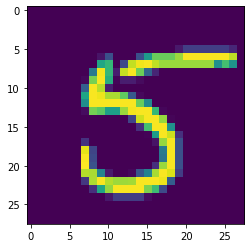

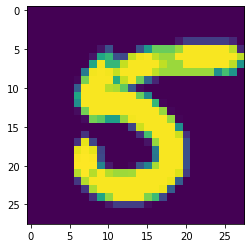

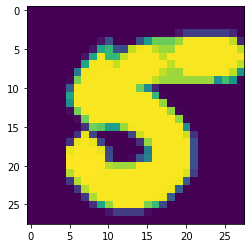

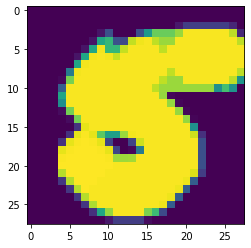

In [92]:
id = 0
data_original = x_train

print("Diamond opening")
data_transformation = train_dillatation_kernel_diamond

plt.imshow(data_original[id]); plt.show()
plt.imshow(data_transformation[id,:,:,0]); plt.show()
plt.imshow(data_transformation[id,:,:,1]); plt.show()
plt.imshow(data_transformation[id,:,:,2]); plt.show()

Diamond opening


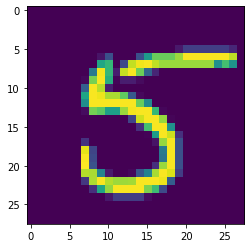

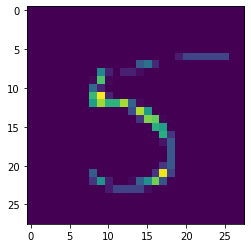

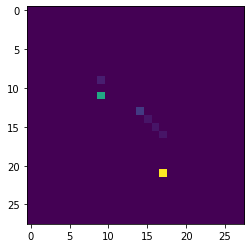

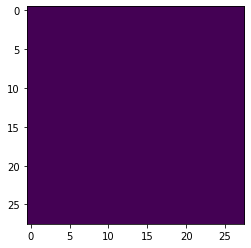

In [93]:
id = 0
data_original = x_train

print("Diamond opening")
data_transformation = train_erosion_kernel_diamond

plt.imshow(data_original[id]); plt.show()
plt.imshow(data_transformation[id,:,:,0]); plt.show()
plt.imshow(data_transformation[id,:,:,1]); plt.show()
plt.imshow(data_transformation[id,:,:,2]); plt.show()

Diamond opening


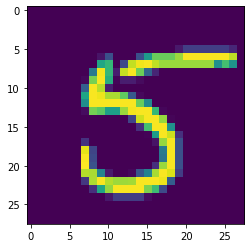

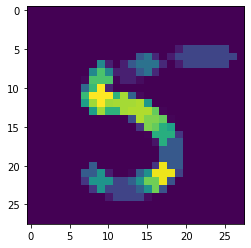

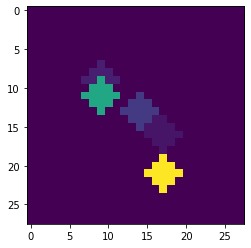

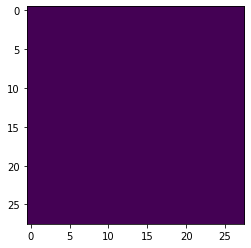

In [94]:
id = 0
data_original = x_train

print("Diamond opening")
data_transformation = train_opening_kernel_diamond

plt.imshow(data_original[id]); plt.show()
plt.imshow(data_transformation[id,:,:,0]); plt.show()
plt.imshow(data_transformation[id,:,:,1]); plt.show()
plt.imshow(data_transformation[id,:,:,2]); plt.show()

Diamond opening


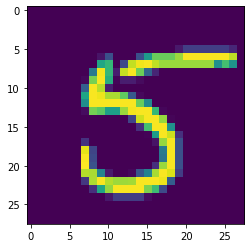

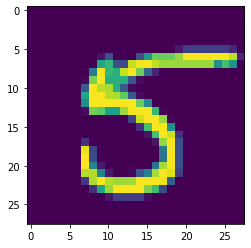

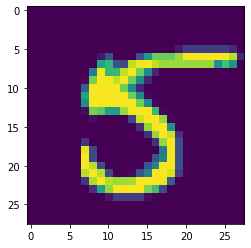

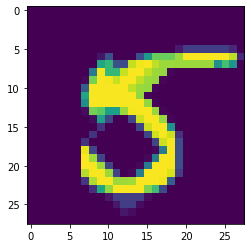

In [95]:
id = 0
data_original = x_train

print("Diamond opening")
data_transformation = train_closing_kernel_diamond

plt.imshow(data_original[id]); plt.show()
plt.imshow(data_transformation[id,:,:,0]); plt.show()
plt.imshow(data_transformation[id,:,:,1]); plt.show()
plt.imshow(data_transformation[id,:,:,2]); plt.show()

# Settings:

In [15]:
batch_size = 512
epochs = 100
early_stopping = 10
shuffle = True
callbacks = [tf.keras.callbacks.EarlyStopping(patience = early_stopping)]

# Reference model:

## Build reference models:

In [16]:
reference_model_1 = build_model_1(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); reference_model_1.summary(); print("\n")
reference_model_2 = build_model_2(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); reference_model_2.summary(); print("\n")
reference_model_3 = build_model_3(image_size = 28, channels = 1, start_neurons = 32, dense_neurons = 128); reference_model_3.summary(); print("\n")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

## Compile reference models:

In [17]:
reference_model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
reference_model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
reference_model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])

## Train reference models:

In [18]:
tf.keras.backend.clear_session()
reference_model_1_results = reference_model_1.fit(x_train,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (x_val, y_val))

tf.keras.backend.clear_session()
reference_model_2_results = reference_model_2.fit(x_train,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (x_val, y_val))

tf.keras.backend.clear_session()
reference_model_3_results = reference_model_3.fit(x_train,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 85us/sample - loss: 0.4136 - accuracy: 0.8913 - val_loss: 0.1410 - val_accuracy: 0.9606
Epoch 2/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0977 - accuracy: 0.9714 - val_loss: 0.0689 - val_accuracy: 0.9796
Epoch 3/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0604 - accuracy: 0.9818 - val_loss: 0.0576 - val_accuracy: 0.9831
Epoch 4/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0550 - val_accuracy: 0.9824
Epoch 5/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0457 - val_accuracy: 0.9860
Epoch 6/100
48000/48000 [==============================] - 1s 26us/sample - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 7/100
48000/48000 [=========================

Epoch 37/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0578 - val_accuracy: 0.9830
Epoch 38/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0156 - accuracy: 0.9950 - val_loss: 0.0978 - val_accuracy: 0.9753
Epoch 39/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.1031 - val_accuracy: 0.9740
Epoch 40/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.2181 - val_accuracy: 0.9640
Epoch 41/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.1405 - val_accuracy: 0.9703
Epoch 42/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0867 - val_accuracy: 0.9780
Epoch 43/100
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0150 - ac

## Gather results for reference models:

In [29]:
reference_model_1_results_pd = pd.DataFrame(reference_model_1_results.history)
reference_model_1_results_pd["model"] = "reference_model_1"
reference_model_1_results_pd["epoch"] = np.array(reference_model_1_results.epoch) + 1

reference_model_2_results_pd = pd.DataFrame(reference_model_2_results.history)
reference_model_2_results_pd["model"] = "reference_model_2"
reference_model_2_results_pd["epoch"] = np.array(reference_model_2_results.epoch) + 1

reference_model_3_results_pd = pd.DataFrame(reference_model_3_results.history)
reference_model_3_results_pd["model"] = "reference_model_3"
reference_model_3_results_pd["epoch"] = np.array(reference_model_3_results.epoch) + 1

reference_models_results = pd.concat([reference_model_1_results_pd,
                                      reference_model_2_results_pd, 
                                      reference_model_3_results_pd])
reference_models_results

,loss,accuracy,val_loss,val_accuracy,model,epoch
0,0.413622,0.891271,0.140950,0.960583,reference_model_1,1
1,0.097740,0.971375,0.068854,0.979583,reference_model_1,2
2,0.060408,0.981833,0.057613,0.983083,reference_model_1,3
3,0.043464,0.987063,0.055015,0.982417,reference_model_1,4
4,0.032529,0.990083,0.045683,0.986000,reference_model_1,5
...,...,...,...,...,...,...
30,0.025084,0.991938,0.029724,0.991167,reference_model_3,31
31,0.024132,0.992188,0.033895,0.990000,reference_model_3,32
32,0.023907,0.991562,0.029500,0.990833,reference_model_3,33
33,0.023872,0.991708,0.031759,0.991333,reference_model_3,34


## Calculate accuracy for reference models:

In [31]:
reference_model_1_train_accuracy = reference_model_1.evaluate(x_train, y_train)[1]
reference_model_1_validation_accuracy = reference_model_1.evaluate(x_val, y_val)[1]
reference_model_1_test_accuracy = reference_model_1.evaluate(x_test, y_test)[1]

reference_model_2_train_accuracy = reference_model_2.evaluate(x_train, y_train)[1]
reference_model_2_validation_accuracy = reference_model_2.evaluate(x_val, y_val)[1]
reference_model_2_test_accuracy = reference_model_2.evaluate(x_test, y_test)[1]

reference_model_3_train_accuracy = reference_model_3.evaluate(x_train, y_train)[1]
reference_model_3_validation_accuracy = reference_model_3.evaluate(x_val, y_val)[1]
reference_model_3_test_accuracy = reference_model_3.evaluate(x_test, y_test)[1]

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0285 - accuracy: 0.9906


# Opening & Closing model:

In [32]:
print("Train opening & closing:")
args = (train_opening_kernel_ellipse, train_opening_kernel_rect, train_opening_kernel_diamond,
        x_train,
        train_closing_kernel_ellipse, train_closing_kernel_rect, train_closing_kernel_diamond)
train_opening_closing = np.concatenate(args, axis = -1)
print(train_opening_closing.shape)
print("--------------------------")

print("Validation opening & closing:")
args = (val_opening_kernel_ellipse, val_opening_kernel_rect, val_opening_kernel_diamond,
        x_val,
        val_closing_kernel_ellipse, val_closing_kernel_rect, val_closing_kernel_diamond)
val_opening_closing = np.concatenate(args, axis = -1)
print(val_opening_closing.shape)
print("--------------------------")

print("Test opening & closing:")
args = (test_opening_kernel_ellipse, test_opening_kernel_rect, test_opening_kernel_diamond,
        x_test,
        test_closing_kernel_ellipse, test_closing_kernel_rect, test_closing_kernel_diamond)
test_opening_closing = np.concatenate(args, axis = -1)
print(test_opening_closing.shape)
print("--------------------------")

Train opening & closing:
(48000, 28, 28, 19)
--------------------------
Validation opening & closing:
(12000, 28, 28, 19)
--------------------------
Test opening & closing:
(10000, 28, 28, 19)
--------------------------


## Build opening & closing models:

In [33]:
opening_closing_model_1 = build_model_1(image_size = 28, channels = train_opening_closing.shape[3], start_neurons = 32, dense_neurons = 128); opening_closing_model_1.summary(); print("\n")
opening_closing_model_2 = build_model_2(image_size = 28, channels = val_opening_closing.shape[3], start_neurons = 32, dense_neurons = 128); opening_closing_model_2.summary(); print("\n")
opening_closing_model_3 = build_model_3(image_size = 28, channels = test_opening_closing.shape[3], start_neurons = 32, dense_neurons = 128); opening_closing_model_3.summary(); print("\n")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 19)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        5504      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

## Compile opening & closing models:

In [34]:
opening_closing_model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
opening_closing_model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
opening_closing_model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])

## Train opening & closing models:

In [35]:
tf.keras.backend.clear_session()
opening_closing_model_1_results = opening_closing_model_1.fit(train_opening_closing,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_opening_closing, y_val))

tf.keras.backend.clear_session()
opening_closing_model_2_results = opening_closing_model_2.fit(train_opening_closing,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_opening_closing, y_val))

tf.keras.backend.clear_session()
opening_closing_model_3_results = opening_closing_model_3.fit(train_opening_closing,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_opening_closing, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 64us/sample - loss: 0.3375 - accuracy: 0.8971 - val_loss: 0.0894 - val_accuracy: 0.9745
Epoch 2/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 3/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 4/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 5/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0497 - val_accuracy: 0.9857
Epoch 6/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 7/100
48000/48000 [=========================

48000/48000 [==============================] - 4s 90us/sample - loss: 0.1344 - accuracy: 0.9596 - val_loss: 1.2934 - val_accuracy: 0.5383
Epoch 4/100
48000/48000 [==============================] - 4s 88us/sample - loss: 0.1045 - accuracy: 0.9691 - val_loss: 0.5914 - val_accuracy: 0.8340
Epoch 5/100
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0940 - accuracy: 0.9705 - val_loss: 0.3223 - val_accuracy: 0.9247
Epoch 6/100
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0778 - accuracy: 0.9760 - val_loss: 0.2071 - val_accuracy: 0.9526
Epoch 7/100
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.1754 - val_accuracy: 0.9605
Epoch 8/100
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.1172 - val_accuracy: 0.9720
Epoch 9/100
48000/48000 [==============================] - 4s 84us/sample - loss: 0.0622 - accuracy: 0.9815 - va

## Gather results for opening & closing models:

In [36]:
opening_closing_model_1_results_pd = pd.DataFrame(opening_closing_model_1_results.history)
opening_closing_model_1_results_pd["model"] = "opening_closing_model_1"
opening_closing_model_1_results_pd["epoch"] = np.array(opening_closing_model_1_results.epoch) + 1

opening_closing_model_2_results_pd = pd.DataFrame(opening_closing_model_2_results.history)
opening_closing_model_2_results_pd["model"] = "opening_closing_model_2"
opening_closing_model_2_results_pd["epoch"] = np.array(opening_closing_model_2_results.epoch) + 1

opening_closing_model_3_results_pd = pd.DataFrame(opening_closing_model_3_results.history)
opening_closing_model_3_results_pd["model"] = "opening_closing_model_3"
opening_closing_model_3_results_pd["epoch"] = np.array(opening_closing_model_3_results.epoch) + 1

opening_closing_models_results = pd.concat([opening_closing_model_1_results_pd,
                                            opening_closing_model_2_results_pd, 
                                            opening_closing_model_3_results_pd])
opening_closing_models_results

,loss,accuracy,val_loss,val_accuracy,model,epoch
0,0.337536,0.897125,0.089411,0.974500,opening_closing_model_1,1
1,0.074393,0.977271,0.060089,0.981750,opening_closing_model_1,2
2,0.045053,0.985646,0.051582,0.984667,opening_closing_model_1,3
3,0.032033,0.990146,0.043184,0.987000,opening_closing_model_1,4
4,0.022380,0.993187,0.049745,0.985667,opening_closing_model_1,5
...,...,...,...,...,...,...
22,0.032062,0.989979,0.221660,0.937583,opening_closing_model_3,23
23,0.031584,0.989917,0.220489,0.937833,opening_closing_model_3,24
24,0.029899,0.990313,0.349761,0.908917,opening_closing_model_3,25
25,0.028864,0.990937,0.172716,0.950333,opening_closing_model_3,26


## Calculate accuracy for opening & closing models:

In [37]:
opening_closing_model_1_train_accuracy = opening_closing_model_1.evaluate(train_opening_closing, y_train)[1]
opening_closing_model_1_validation_accuracy = opening_closing_model_1.evaluate(val_opening_closing, y_val)[1]
opening_closing_model_1_test_accuracy = opening_closing_model_1.evaluate(test_opening_closing, y_test)[1]

opening_closing_model_2_train_accuracy = opening_closing_model_2.evaluate(train_opening_closing, y_train)[1]
opening_closing_model_2_validation_accuracy = opening_closing_model_2.evaluate(val_opening_closing, y_val)[1]
opening_closing_model_2_test_accuracy = opening_closing_model_2.evaluate(test_opening_closing, y_test)[1]

opening_closing_model_3_train_accuracy = opening_closing_model_3.evaluate(train_opening_closing, y_train)[1]
opening_closing_model_3_validation_accuracy = opening_closing_model_3.evaluate(val_opening_closing, y_val)[1]
opening_closing_model_3_test_accuracy = opening_closing_model_3.evaluate(test_opening_closing, y_test)[1]

10000/10000 [==============================] - 1s 97us/sample - loss: 0.3461 - accuracy: 0.9142


# Dillatation & Erosion model:

In [38]:
print("Train dillatation & erosion:")
args = (train_dillatation_kernel_ellipse, train_dillatation_kernel_rect, train_dillatation_kernel_diamond,
        x_train,
        train_erosion_kernel_ellipse, train_erosion_kernel_rect, train_erosion_kernel_diamond)
train_dillatation_erosion = np.concatenate(args, axis = -1)
print(train_dillatation_erosion.shape)
print("--------------------------")

print("Validation dillatation & erosion:")
args = (val_dillatation_kernel_ellipse, val_dillatation_kernel_rect, val_dillatation_kernel_diamond,
        x_val,
        val_erosion_kernel_ellipse, val_erosion_kernel_rect, val_erosion_kernel_diamond)
val_dillatation_erosion = np.concatenate(args, axis = -1)
print(val_dillatation_erosion.shape)
print("--------------------------")

print("Test dillatation & erosion:")
args = (test_dillatation_kernel_ellipse, test_dillatation_kernel_rect, test_dillatation_kernel_diamond,
        x_test,
        test_erosion_kernel_ellipse, test_erosion_kernel_rect, test_erosion_kernel_diamond)
test_dillatation_erosion = np.concatenate(args, axis = -1)
print(test_dillatation_erosion.shape)
print("--------------------------")

Train dillatation & erosion:
(48000, 28, 28, 19)
--------------------------
Validation dillatation & erosion:
(12000, 28, 28, 19)
--------------------------
Test dillatation & erosion:
(10000, 28, 28, 19)
--------------------------


## Build dillatation & closing models:

In [39]:
dillatation_erosion_model_1 = build_model_1(image_size = 28, channels = train_dillatation_erosion.shape[3], start_neurons = 32, dense_neurons = 128); dillatation_erosion_model_1.summary(); print("\n")
dillatation_erosion_model_2 = build_model_2(image_size = 28, channels = val_dillatation_erosion.shape[3], start_neurons = 32, dense_neurons = 128); dillatation_erosion_model_2.summary(); print("\n")
dillatation_erosion_model_3 = build_model_3(image_size = 28, channels = test_dillatation_erosion.shape[3], start_neurons = 32, dense_neurons = 128); dillatation_erosion_model_3.summary(); print("\n")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 19)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        5504      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290

## Compile dillatation & closing models:

In [40]:
dillatation_erosion_model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
dillatation_erosion_model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])
dillatation_erosion_model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                          loss = tf.keras.losses.categorical_crossentropy,
                          metrics = ["accuracy"])

## Train dillatation & closing models:

In [41]:
tf.keras.backend.clear_session()
dillatation_erosion_model_1_results = dillatation_erosion_model_1.fit(train_dillatation_erosion,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_dillatation_erosion, y_val))

tf.keras.backend.clear_session()
dillatation_erosion_model_2_results = dillatation_erosion_model_2.fit(train_dillatation_erosion,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_dillatation_erosion, y_val))

tf.keras.backend.clear_session()
dillatation_erosion_model_3_results = dillatation_erosion_model_3.fit(train_dillatation_erosion,
                                        y_train, 
                                        batch_size = batch_size, 
                                        epochs = epochs, 
                                        shuffle = shuffle,
                                        callbacks = callbacks,
                                        validation_data = (val_dillatation_erosion, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 59us/sample - loss: 0.4198 - accuracy: 0.8705 - val_loss: 0.1552 - val_accuracy: 0.9524
Epoch 2/100
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0994 - accuracy: 0.9700 - val_loss: 0.0710 - val_accuracy: 0.9780
Epoch 3/100
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0595 - val_accuracy: 0.9822
Epoch 4/100
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0443 - accuracy: 0.9866 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 5/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0514 - val_accuracy: 0.9844
Epoch 6/100
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0471 - val_accuracy: 0.9863
Epoch 7/100
48000/48000 [=========================

48000/48000 [==============================] - 4s 88us/sample - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.1540 - val_accuracy: 0.9532
Epoch 15/100
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0832 - val_accuracy: 0.9777
Epoch 16/100
48000/48000 [==============================] - 4s 90us/sample - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.1803 - val_accuracy: 0.9443
Epoch 17/100
48000/48000 [==============================] - 4s 87us/sample - loss: 0.0407 - accuracy: 0.9874 - val_loss: 0.1115 - val_accuracy: 0.9675
Epoch 18/100
48000/48000 [==============================] - 4s 88us/sample - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.1756 - val_accuracy: 0.9443
Epoch 19/100
48000/48000 [==============================] - 4s 89us/sample - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0807 - val_accuracy: 0.9755
Epoch 20/100
48000/48000 [==============================] - 4s 86us/sample - loss: 0.0369 - accuracy: 0.988

## Gather results for dillatation & closing models:

In [42]:
dillatation_erosion_model_1_results_pd = pd.DataFrame(dillatation_erosion_model_1_results.history)
dillatation_erosion_model_1_results_pd["model"] = "dillatation_erosion_model_1"
dillatation_erosion_model_1_results_pd["epoch"] = np.array(dillatation_erosion_model_1_results.epoch) + 1

dillatation_erosion_model_2_results_pd = pd.DataFrame(dillatation_erosion_model_2_results.history)
dillatation_erosion_model_2_results_pd["model"] = "dillatation_erosion_model_2"
dillatation_erosion_model_2_results_pd["epoch"] = np.array(dillatation_erosion_model_2_results.epoch) + 1

dillatation_erosion_model_3_results_pd = pd.DataFrame(dillatation_erosion_model_3_results.history)
dillatation_erosion_model_3_results_pd["model"] = "dillatation_erosion_model_3"
dillatation_erosion_model_3_results_pd["epoch"] = np.array(dillatation_erosion_model_3_results.epoch) + 1

dillatation_erosion_models_results = pd.concat([dillatation_erosion_model_1_results_pd,
                                            dillatation_erosion_model_2_results_pd, 
                                            dillatation_erosion_model_3_results_pd])
dillatation_erosion_models_results

,loss,accuracy,val_loss,val_accuracy,model,epoch
0,0.419817,0.870542,0.155222,0.952417,dillatation_erosion_model_1,1
1,0.099404,0.969979,0.070988,0.978000,dillatation_erosion_model_1,2
2,0.064038,0.980375,0.059503,0.982250,dillatation_erosion_model_1,3
3,0.044316,0.986625,0.050706,0.984583,dillatation_erosion_model_1,4
4,0.037739,0.988021,0.051363,0.984417,dillatation_erosion_model_1,5
...,...,...,...,...,...,...
31,0.024981,0.991875,0.099034,0.969583,dillatation_erosion_model_3,32
32,0.024048,0.992000,0.075712,0.977167,dillatation_erosion_model_3,33
33,0.022959,0.993146,0.081671,0.975333,dillatation_erosion_model_3,34
34,0.023277,0.992292,0.067159,0.979750,dillatation_erosion_model_3,35


## Calculate accuracy for dillataion & erosion models:

In [43]:
dillatation_erosion_model_1_train_accuracy = dillatation_erosion_model_1.evaluate(train_dillatation_erosion, y_train)[1]
dillatation_erosion_model_1_validation_accuracy = dillatation_erosion_model_1.evaluate(val_dillatation_erosion, y_val)[1]
dillatation_erosion_model_1_test_accuracy = dillatation_erosion_model_1.evaluate(test_dillatation_erosion, y_test)[1]

dillatation_erosion_model_2_train_accuracy = dillatation_erosion_model_2.evaluate(train_dillatation_erosion, y_train)[1]
dillatation_erosion_model_2_validation_accuracy = dillatation_erosion_model_2.evaluate(val_dillatation_erosion, y_val)[1]
dillatation_erosion_model_2_test_accuracy = dillatation_erosion_model_2.evaluate(test_dillatation_erosion, y_test)[1]

dillatation_erosion_model_3_train_accuracy = dillatation_erosion_model_3.evaluate(train_dillatation_erosion, y_train)[1]
dillatation_erosion_model_3_validation_accuracy = dillatation_erosion_model_3.evaluate(val_dillatation_erosion, y_val)[1]
dillatation_erosion_model_3_test_accuracy = dillatation_erosion_model_3.evaluate(test_dillatation_erosion, y_test)[1]

10000/10000 [==============================] - 1s 102us/sample - loss: 0.0508 - accuracy: 0.9851


# Summary:

Epochs per model and input:
                         model  size
3      opening_closing_model_1    14
0  dillatation_erosion_model_1    17
6            reference_model_1    18
1  dillatation_erosion_model_2    23
5      opening_closing_model_3    27
8            reference_model_3    35
2  dillatation_erosion_model_3    36
4      opening_closing_model_2    37
7            reference_model_2    47


Average epochs per input
                        type       size
0  dillatation_erosion_model  25.333333
1      opening_closing_model  26.000000
2            reference_model  33.333333


<AxesSubplot:xlabel='epoch', ylabel='val_accuracy'>

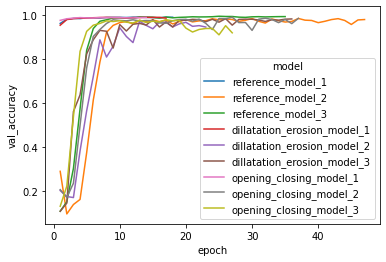

In [85]:
all_results = pd.concat([reference_models_results, dillatation_erosion_models_results, opening_closing_models_results])

# Epochs - time of learning:
print("Epochs per model and input:")
results_1 = all_results.groupby("model", as_index = False).size().sort_values(by = "size")
print(results_1)

print("\n")
print("Average epochs per input")
results_1["type"] = results_1["model"].apply(lambda x: x[:-2])
results_1 = results_1.groupby("type", as_index = False)["size"].mean().sort_values(by = "size")
print(results_1)

sns.lineplot(x="epoch", y="val_accuracy", hue = "model", data = all_results)

In [89]:
final_results = pd.DataFrame({"train" : [reference_model_1_train_accuracy, reference_model_2_train_accuracy, reference_model_3_train_accuracy,
                         opening_closing_model_1_train_accuracy, opening_closing_model_2_train_accuracy, opening_closing_model_3_train_accuracy,
                         dillatation_erosion_model_1_train_accuracy, dillatation_erosion_model_2_train_accuracy, dillatation_erosion_model_3_train_accuracy],
              "validation" : [reference_model_1_validation_accuracy, reference_model_2_validation_accuracy, reference_model_3_validation_accuracy,
                              opening_closing_model_1_validation_accuracy, opening_closing_model_2_validation_accuracy, opening_closing_model_3_validation_accuracy,
                              dillatation_erosion_model_1_validation_accuracy, dillatation_erosion_model_2_validation_accuracy, dillatation_erosion_model_3_validation_accuracy],
              "test" : [reference_model_1_test_accuracy, reference_model_2_test_accuracy, reference_model_3_test_accuracy,
                        opening_closing_model_1_test_accuracy, opening_closing_model_2_test_accuracy, opening_closing_model_3_test_accuracy,
                        dillatation_erosion_model_1_test_accuracy, dillatation_erosion_model_2_test_accuracy, dillatation_erosion_model_3_test_accuracy],
              "model" : ["reference_model_1", "reference_model_2", "reference_model_3",
                         "opening_closing_model_1", "opening_closing_model_2", "opening_closing_model_3",
                         "dillatation_erosion_model_1", "dillatation_erosion_model_2", "dillatation_erosion_model_3"]})
final_results.sort_values(by = "test", ascending = False)

,train,validation,test,model
2,0.994187,0.991500,0.9906,reference_model_3
0,0.999708,0.988583,0.9891,reference_model_1
3,0.999396,0.987333,0.9889,opening_closing_model_1
8,0.984354,0.980833,0.9851,dillatation_erosion_model_3
4,0.992063,0.983583,0.9843,opening_closing_model_2
6,0.995417,0.984583,0.9823,dillatation_erosion_model_1
1,0.986500,0.978167,0.9786,reference_model_2
7,0.953146,0.944250,0.9467,dillatation_erosion_model_2
5,0.919667,0.918000,0.9142,opening_closing_model_3
